# EDA For 12 months worth of Sales Data

### Introduction: Data Cleaning, Merging, and Manipulation using Python

In any data analysis project, the quality and preparation of the data are paramount to obtaining meaningful insights. This process is commonly referred to as **data cleaning** and **data manipulation**, which involves detecting and correcting (or removing) inaccurate, corrupted, or incomplete records. With Python, particularly using libraries like Pandas, NumPy, and Matplotlib, data cleaning and manipulation become more efficient and structured, making it easier to prepare raw data for analysis. These techniques ensure that the data is consistent, accurate, and ready for deeper exploration.

In this project, we are tasked with analyzing 12 months of sales data to uncover insights that can help improve business strategy. The first step is to **merge the datasets** for each month into a single, consolidated file. This is crucial as it allows us to perform comprehensive analyses over the entire year rather than on fragmented pieces of data. Once the data is merged, we can then proceed with **data cleaning**, which involves handling missing values, correcting inconsistencies, and ensuring the data types are appropriate for analysis.

After cleaning the data, **data manipulation** will help us to reshape and transform the dataset, facilitating the extraction of valuable insights. Using Python, we can easily group, filter, and aggregate the data to uncover trends and patterns in sales, customer behavior, and product performance.

### Project Objectives:

The primary goal of this analysis is to clean, manipulate, and explore the 12 months of sales data in order to extract actionable insights. Specifically, the objectives are:

1. **Merge the 12 months of sales data into a single CSV file**  
   Combining all monthly datasets into one comprehensive file to facilitate analysis and provide a unified view of the sales data.

2. **Identify the best month for sales and calculate the earnings for that month**  
   Determine which month saw the highest sales performance and calculate the total revenue generated in that month.

3. **Find the city with the highest number of sales**  
   Identify which city had the most transactions during the year and explore any possible patterns related to location-based sales.

4. **Identify the product that sold the most and explain why it had the highest sales**  
   Pinpoint the best-selling product of the year and offer possible reasons behind its success based on the sales data, customer preferences, or external factors.

By achieving these objectives, we aim to gain a comprehensive understanding of the sales performance over the past year and generate actionable insights that can guide future business decisions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
###  Importing multiple csv files and merging the 12 months sales data into a single dataframe

# csv files path
csv_files = glob.glob('C:/Users/SD/Downloads/Sales_Data/*.csv')

# Read and concatenate all CSV files into one DataFrame
merged_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Check the first few rows
print(merged_df.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [4]:
merged_df.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
merged_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
## Doppin the null values because an order without an order ID is not useful
merged_df.dropna(axis=0, inplace=True)


In [7]:
merged_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Columns that are supposed to be numerical and Date seems to be in string format. We will convert the datatype to the required datatypes


In [20]:
# Convert 'Quantity Ordered' and 'Price Each' to numeric, coercing errors to NaN (in case of invalid data)
merged_df['Quantity Ordered'] = pd.to_numeric(merged_df['Quantity Ordered'], errors='coerce')
merged_df['Price Each'] = pd.to_numeric(merged_df['Price Each'], errors='coerce')


In [33]:
# Convert 'Order Date' to datetime type
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%m/%d/%Y', errors='coerce')


In [34]:
# Check the data types of the columns
print(merged_df.dtypes)


Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Sales                      float64
dtype: object


In [35]:
merged_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",11.99


In [25]:
# removing time from the date
merged_df['Order Date'] = merged_df['Order Date'].dt.date


In [26]:
merged_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001"


In [27]:
## create columns for the metrics

merged_df['Sales'] = merged_df['Quantity Ordered'] * merged_df['Price Each']

In [40]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,year,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",23.90,2019.0,4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",99.99,2019.0,4.0
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",600.00,2019.0,4.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",11.99,2019.0,4.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",11.99,2019.0,4.0


Task 2: Identify the best month for sales and calculate the earnings for that month

In [45]:

## Extracting year and Month column from the order date column
merged_df['year'] = pd.to_datetime(merged_df['Order Date'], errors='coerce').dt.year
merged_df['month'] = pd.to_datetime(merged_df['Order Date'], errors='coerce').dt.month



In [39]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,year,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",23.90,2019.0,4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",99.99,2019.0,4.0
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",600.00,2019.0,4.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",11.99,2019.0,4.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",11.99,2019.0,4.0


In [46]:
# Changing  month numbers to month names
month_dict = {
    1.0: 'January', 2.0: 'February', 3.0: 'March', 4.0: 'April', 5.0: 'May', 6.0: 'June',
    7.0: 'July', 8.0: 'August', 9.0: 'September', 10.0: 'October', 11.0: 'November', 12.0: 'December'
}

year_dict = {2019.0: '2019'}

# Map the 'month' column to the corresponding month names
merged_df['month'] = merged_df['month'].map(month_dict)
merged_df['year'] = merged_df['year'].map(year_dict)

# Check the result
print(merged_df[['Order Date', 'year', 'month']].head())


  Order Date  year  month
0 2019-04-19  2019  April
2 2019-04-07  2019  April
3 2019-04-12  2019  April
4 2019-04-12  2019  April
5 2019-04-30  2019  April


In [47]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,year,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",23.90,2019,April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",99.99,2019,April
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,April
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,April
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",11.99,2019,April


C:\Users\SD\AppData\Local\Temp\ipykernel_27552\705275131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


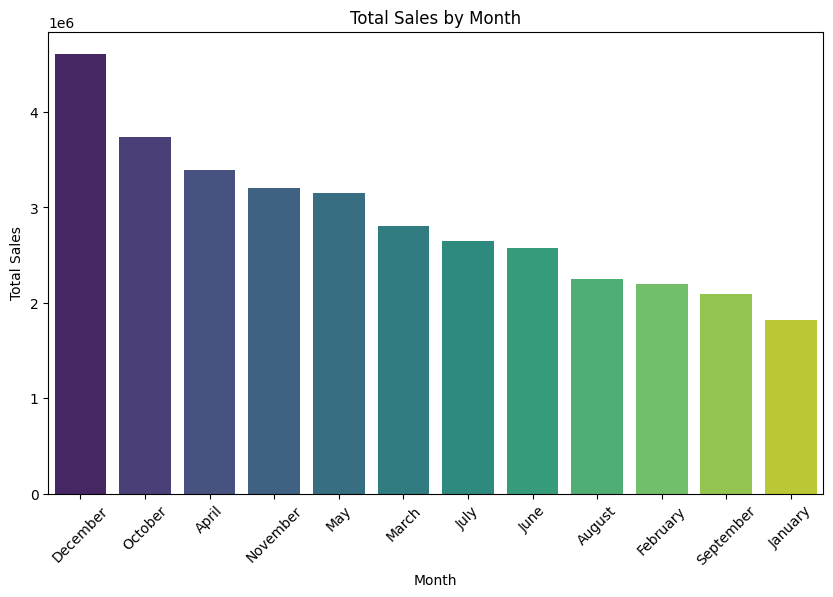

In [50]:
monthly_sales = merged_df.groupby('month')['Sales'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()

The best month for sales is December with 4613443.34

# Task 3 : what city had the highest number of sales ?


In [53]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,year,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",23.90,2019,April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",99.99,2019,April
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,April
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,April
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",11.99,2019,April


In [56]:
##  To answer the question, a column named City will be extracted from the Purchase address

merged_df['City'] = merged_df['Purchase Address'].str.split(
    ',').str[1] + ' ' + merged_df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]


In [57]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,year,month,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",23.90,2019,April,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",99.99,2019,April,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,April,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,April,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",11.99,2019,April,Los Angeles CA


C:\Users\SD\AppData\Local\Temp\ipykernel_27552\2744797438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')


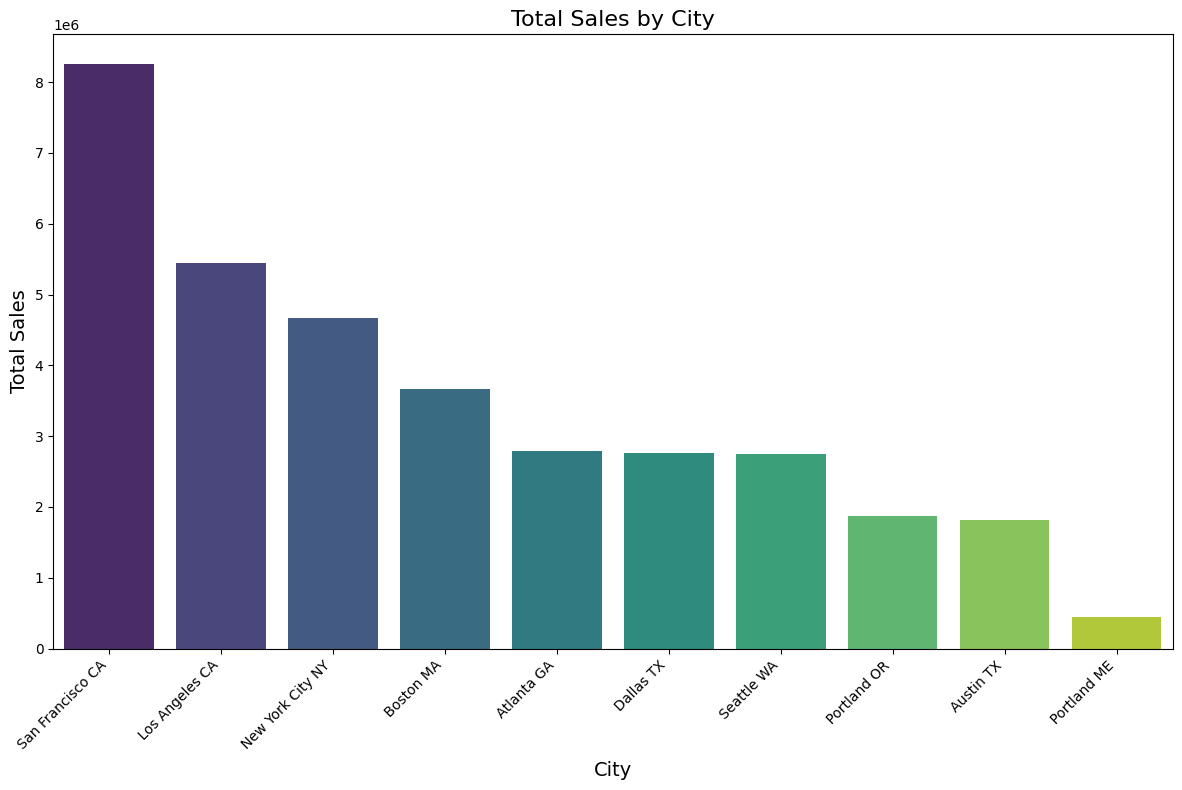

In [61]:
city_sales = merged_df.groupby('City')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')

plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales by City', fontsize=16)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

The city has the highest number of sales is San Francisco 8262203.91

### Task 4 : What product sold the most ? why do you think it sold the most ?

In [8]:
merged_df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: count, dtype: int64

The product that sold the most appears to be the "USB-C Charging Cable" with a total of 21,903 units sold.

There could be several reasons why the "USB-C Charging Cable" sold the most:

Compatibility: USB-C Charging Cables are versatile and compatible with a wide range of devices, including smartphones, tablets, laptops, and even some accessories. This broad compatibility may have contributed to higher sales.

Necessity: Charging cables are essential accessories for electronic devices. Many people require multiple charging cables for their devices, which could drive up sales.

Affordability: Charging cables are relatively inexpensive compared to other electronic accessories, making them an affordable and frequently replaced item. This could lead to higher sales volume.

Replacement Market: People often need to replace charging cables due to wear and tear, damage, or loss. This constant need for replacements can drive consistent sales.

Promotions and Bundles: The product may have been bundled with other popular products or featured in promotions, which can boost sales. For example, it might have been included as an accessory in smartphone or laptop bundles.

Brand Reputation: The brand reputation and quality of the USB-C Charging Cable could also play a role. If customers trust the brand for producing reliable and durable cables, it may lead to higher sales.

Market Trends: At the time of the data collection, USB-C technology was becoming more prevalent, and many new devices were adopting it. This trend could have driven increased sales of USB-C cables.